In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.optimize as opt
import random
np.random.seed(seed=233423)


In [2]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b


def RhoSq(y_hat, y_true): # like in Turchin's original PCA paper
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )


In [3]:
#Data = pd.read_excel("sc.pc.15May2023.xlsx")

#Data = pd.read_csv("SPC1Dat.Relation.csv", index_col = 0)

Data = pd.read_excel("SPC1Dat.Relation_Pol_Culture.xlsx")#, index_col = 0)

del Data["RelTime"] # artefact of data preprocessing 
Maximum = max(Data.SPC)
Minimum = min(Data.SPC)
Data.SPC = (Data.SPC-Minimum)/(Maximum-Minimum) 
print(Minimum, Maximum)
print(min(Data.SPC), max(Data.SPC))

2.30065881002946 8.26820181756822
0.0 1.0


In [4]:
Data.head(), Data.columns

(               NGA    PolID  Time       SPC Culture.Cont Polity.Cont Notes
 0  Basin of Mexico  MxArch* -6000  0.152382          NaN         NaN   NaN
 1  Basin of Mexico  MxArch* -5900  0.152382          NaN         NaN   NaN
 2  Basin of Mexico  MxArch* -5800  0.152382          NaN         NaN   NaN
 3  Basin of Mexico  MxArch* -5700  0.152382          NaN         NaN   NaN
 4  Basin of Mexico  MxArch* -5600  0.152382          NaN         NaN   NaN,
 Index(['NGA', 'PolID', 'Time', 'SPC', 'Culture.Cont', 'Polity.Cont', 'Notes'], dtype='object'))

In [5]:
#Data = Data.rename(columns = {"Date.From": "Time"})
Data = Data.rename(columns = {"SPC": "PC1"})
Data.head(), Data.columns

(               NGA    PolID  Time       PC1 Culture.Cont Polity.Cont Notes
 0  Basin of Mexico  MxArch* -6000  0.152382          NaN         NaN   NaN
 1  Basin of Mexico  MxArch* -5900  0.152382          NaN         NaN   NaN
 2  Basin of Mexico  MxArch* -5800  0.152382          NaN         NaN   NaN
 3  Basin of Mexico  MxArch* -5700  0.152382          NaN         NaN   NaN
 4  Basin of Mexico  MxArch* -5600  0.152382          NaN         NaN   NaN,
 Index(['NGA', 'PolID', 'Time', 'PC1', 'Culture.Cont', 'Polity.Cont', 'Notes'], dtype='object'))

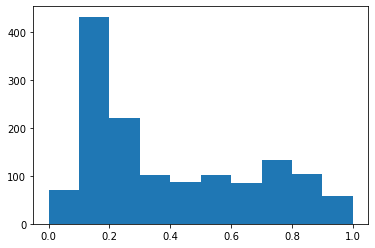

0.29682804546734304


In [6]:
plt.hist(Data.PC1)
plt.show()

print(np.median(Data.PC1))

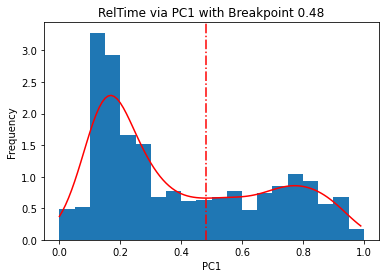

In [7]:
plt.hist(Data["PC1"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)

#KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
KDE_min = np.min(KDE[35:65])  # find the minimum in the centre


xmin = x[KDE == KDE_min] # x-position of the minimum
plt.plot(x, KDE, c="red")
plt.axvline(xmin, linestyle="-.",c="red", )
plt.title("RelTime via PC1 with Breakpoint "+str(np.round(xmin[0],2)))
plt.xlabel("PC1")
plt.ylabel("Frequency")
plt.show()

PC_Break = xmin



In [64]:
print("Rescaled Breakpoint",PC_Break * (Maximum-Minimum)  + Minimum)


Rescaled Breakpoint [5.16507945]


#### Now the same with SPC1Dat.Relation_Pol_Culture

In [9]:
#Data = pd.read_excel("sc.pc.15May2023.xlsx")

Data2 = pd.read_excel("SPC1Dat.Relation_Pol_Culture.xlsx", index_col = 0)
Maximum2 = max(Data2.SPC)
Minimum2 = min(Data2.SPC)
Data2.SPC = (Data2.SPC-Minimum2)/(Maximum2-Minimum2) 
print(Minimum2, Maximum2)
print(min(Data2.SPC), max(Data2.SPC))

2.30065881002946 8.26820181756822
0.0 1.0


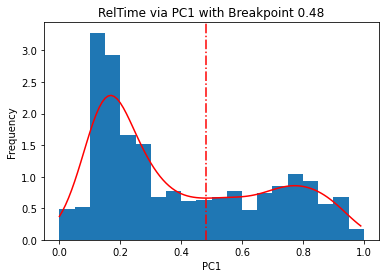

Rescaled Breakpoint [5.16507945]


In [10]:
plt.hist(Data2["SPC"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE2 = gaussian_kde(Data2["SPC"])(x)

#KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
KDE_min2 = np.min(KDE2[35:65])  # find the minimum in the centre


xmin2 = x[KDE2 == KDE_min2] # x-position of the minimum
plt.plot(x, KDE2, c="red")
plt.axvline(xmin2, linestyle="-.",c="red", )
plt.title("RelTime via PC1 with Breakpoint "+str(np.round(xmin2[0],2)))
plt.xlabel("PC1")
plt.ylabel("Frequency")
plt.show()

PC_Break2 = xmin2

print("Rescaled Breakpoint",PC_Break2 * (Maximum2-Minimum2)  + Minimum2)


In [11]:
NGAlist = list(set(Data["NGA"]))
print(len(NGAlist))
LargeNGAs = []
SmallNGAs = []

for NGA in NGAlist:
    Subset = Data[Data["NGA"] == NGA]
    Logical = np.max(Subset["PC1"]) > PC_Break # Is this polity large enough to cross the PC1 threshold?
    print("Is " +NGA+" large enough?",  Logical)
    if Logical:
        LargeNGAs.append(NGA)
    else:
        SmallNGAs.append(NGA)
    #print(Subset)
print(LargeNGAs)

35
Is Finger Lakes large enough? [False]
Is North Colombia large enough? [False]
Is Paris Basin large enough? [ True]
Is Kansai large enough? [ True]
Is Sogdiana large enough? [ True]
Is Iceland large enough? [False]
Is Niger Inland Delta large enough? [ True]
Is Valley of Oaxaca large enough? [ True]
Is Ghanaian Coast large enough? [ True]
Is Galilee large enough? [ True]
Is Cahokia large enough? [False]
Is Deccan large enough? [ True]
Is Latium large enough? [ True]
Is Cuzco large enough? [ True]
Is Crete large enough? [ True]
Is Orkhon Valley large enough? [ True]
Is Basin of Mexico large enough? [ True]
Is Southern Mesopotamia large enough? [ True]
Is Konya Plain large enough? [ True]
Is Big Island Hawaii large enough? [False]
Is Southern China Hills large enough? [False]
Is Yemeni Coastal Plain large enough? [ True]
Is Middle Ganga large enough? [ True]
Is Lena River Valley large enough? [False]
Is Susiana large enough? [ True]
Is Upper Egypt large enough? [ True]
Is Lowland Andes

In [12]:
Old_Large = ['Paris Basin', 'Kansai', 'Deccan', 'Susiana', 'Latium', 'Cuzco', 'Orkhon Valley',
             'Central Java', 'Ghanaian Coast', 'Konya Plain', 'Niger Inland Delta', 'Kachi Plain', 
             'Iceland', 'Cambodian Basin', 'Upper Egypt', 'Middle Yellow River Valley', 'Yemeni Coastal Plain',
             'Sogdiana']


for nga in Old_Large:
    print(nga, nga in LargeNGAs)
    
print("New:")
for nga in LargeNGAs:
    if nga not in Old_Large:
        print(nga)

Paris Basin True
Kansai True
Deccan True
Susiana True
Latium True
Cuzco True
Orkhon Valley True
Central Java True
Ghanaian Coast True
Konya Plain True
Niger Inland Delta True
Kachi Plain True
Iceland False
Cambodian Basin True
Upper Egypt True
Middle Yellow River Valley True
Yemeni Coastal Plain True
Sogdiana True
New:
Valley of Oaxaca
Galilee
Crete
Basin of Mexico
Southern Mesopotamia
Middle Ganga


## Find their RelTimes

In [13]:
Seshat_Large = Data[Data["NGA"].isin(LargeNGAs)]
print(Seshat_Large)


Data_RT = pd.DataFrame(columns = Seshat_Large.columns)
DF_Tzero = pd.DataFrame(columns = ["NGA", "T0"])

# go through the NGAs
for NGA in list(set(Seshat_Large["NGA"])):
    
    # Subset of this NGA's data
    NGA_dat = Seshat_Large[Seshat_Large["NGA"] == NGA].copy()
    # Calculate this NGA's Time Zero
    NGA_TimeZero =NGA_dat["Time"].loc[NGA_dat["PC1"]> PC_Break[0]].iloc[0]
    print(NGA,NGA_TimeZero)
    # Shift the Time Scale
    NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
    
    # And combine it to a new Data Frame
    Data_RT = pd.concat([Data_RT, NGA_dat])
    DF_Tzero = pd.concat([DF_Tzero, pd.DataFrame(data={"NGA": [NGA], "T0": [NGA_TimeZero]})])
    print(NGA_dat[["Time", "PC1"]])
    print(" ________________________ ")

                       NGA    PolID  Time       PC1 Culture.Cont Polity.Cont  \
0          Basin of Mexico  MxArch* -6000  0.152382          NaN         NaN   
1          Basin of Mexico  MxArch* -5900  0.152382          NaN         NaN   
2          Basin of Mexico  MxArch* -5800  0.152382          NaN         NaN   
3          Basin of Mexico  MxArch* -5700  0.152382          NaN         NaN   
4          Basin of Mexico  MxArch* -5600  0.152382          NaN         NaN   
...                    ...      ...   ...       ...          ...         ...   
1391  Yemeni Coastal Plain  YeRasul  1400  0.730293          NaN         NaN   
1392  Yemeni Coastal Plain  YeTahir  1500  0.735025          NaN         NaN   
1393  Yemeni Coastal Plain  TrOttm3  1600  0.976995          NaN         NaN   
1394  Yemeni Coastal Plain  YeQasmi  1700  0.591981          NaN         NaN   
1395  Yemeni Coastal Plain  YeQasmi  1800  0.591981          NaN         NaN   

     Notes  
0      NaN  
1      NaN  


[109 rows x 2 columns]
 ________________________ 
Konya Plain -2000
     Time       PC1
507 -7600  0.104723
508 -7500  0.104723
509 -7400  0.104723
510 -7300  0.104723
511 -7200  0.104723
..    ...       ...
617  3400  0.739836
618  3500  0.830151
619  3600  0.945443
620  3700  0.938736
621  3800  0.928816

[115 rows x 2 columns]
 ________________________ 
Yemeni Coastal Plain 200
      Time       PC1
1342 -3700  0.192048
1343 -3600  0.192048
1344 -3500  0.192048
1345 -3400  0.192048
1346 -3300  0.192048
1347 -3200  0.192048
1348 -3100  0.192048
1349 -3000  0.192048
1350 -2900  0.192048
1351 -2800  0.192048
1352 -2700  0.192048
1353 -2600  0.192048
1354 -2500  0.192048
1355 -2400  0.192048
1356 -2300  0.192048
1357 -2200  0.192048
1358 -2100  0.192048
1359 -2000  0.192048
1360 -1900  0.192048
1361 -1800  0.192048
1362 -1700  0.192048
1363 -1600  0.192048
1364 -1500  0.192048
1365 -1400  0.216704
1366 -1300  0.216704
1367 -1200  0.216704
1368 -1100  0.216704
1369 -1000  0.463289
1370  -

In [14]:
NGA_dat

,NGA,PolID,Time,PC1,Culture.Cont,Polity.Cont,Notes
109,Cambodian Basin,KhMekBA,-1500,0.108448,NaN,NaN,NaN
110,Cambodian Basin,KhMekBA,-1400,0.108448,NaN,NaN,NaN
111,Cambodian Basin,KhMekBA,-1300,0.108448,NaN,NaN,NaN
112,Cambodian Basin,KhMekBA,-1200,0.108448,NaN,NaN,NaN
113,Cambodian Basin,KhMekBA,-1100,0.108448,NaN,NaN,NaN
114,Cambodian Basin,KhMekBA,-1000,0.108448,NaN,NaN,NaN
115,Cambodian Basin,KhMekBA,-900,0.108448,NaN,NaN,NaN
116,Cambodian Basin,KhMekIA,-800,0.135589,NaN,NaN,NaN
117,Cambodian Basin,KhMekIA,-700,0.135589,NaN,NaN,NaN
118,Cambodian Basin,KhMekIA,-600,0.135589,NaN,NaN,NaN


In [15]:
DF_Tzero.set_index("NGA", inplace=True)
DF_Tzero.transpose().to_csv("NEW_TimeZero.csv")
DF_Tzero.transpose(), DF_Tzero.head(23)

(NGA Paris Basin Kansai Sogdiana Niger Inland Delta Valley of Oaxaca  \
 T0         -100    300     -500               1000             1600   
 
 NGA Ghanaian Coast Galilee Deccan Latium Cuzco  ... Southern Mesopotamia  \
 T0            1800   -2000   -300   -500   700  ...                -2900   
 
 NGA Konya Plain Yemeni Coastal Plain Middle Ganga Susiana Upper Egypt  \
 T0        -2000                  200         -600   -3100       -3100   
 
 NGA Kachi Plain Middle Yellow River Valley Central Java Cambodian Basin  
 T0        -2500                      -1600          800             300  
 
 [1 rows x 23 columns],
                                T0
 NGA                              
 Paris Basin                  -100
 Kansai                        300
 Sogdiana                     -500
 Niger Inland Delta           1000
 Valley of Oaxaca             1600
 Ghanaian Coast               1800
 Galilee                     -2000
 Deccan                       -300
 Latium               

In [16]:
Data_RT = Data_RT.rename(columns={'Time':'RelTime'})

Data_RT.head()

,NGA,PolID,RelTime,PC1,Culture.Cont,Polity.Cont,Notes
936,Paris Basin,FrBeakr,-3100,0.221819,NaN,NaN,NaN
937,Paris Basin,FrBeakr,-3000,0.221819,NaN,NaN,NaN
938,Paris Basin,FrBeakr,-2900,0.221819,NaN,NaN,NaN
939,Paris Basin,FrBeakr,-2800,0.221819,NaN,NaN,NaN
940,Paris Basin,FrBeakr,-2700,0.221819,NaN,NaN,NaN


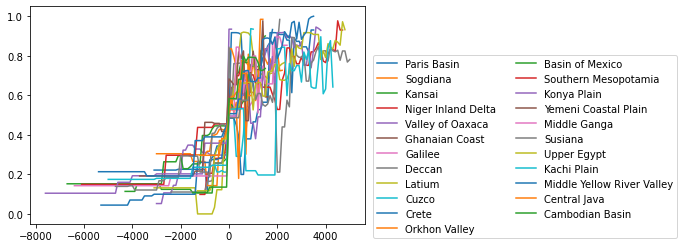

In [17]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"], DF["PC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

## Fitting

In [18]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["PC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data


(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)

p0 = np.array((a_, b_, c_, d_))
print(p0)

print(a_, b_, c_, d_)
x_show = np.arange(min(X), max(X)+1000/T,100/T) # evaluate the estimated function here
print(min(x_show), max(x_show))
y_hat = f(x_show, a_, b_, c_, d_)

[0.6414222  0.15295979 8.10204866 0.00981527]
0.6414222003761785 0.15295979460285525 8.102048663049045 0.009815270926169708
-1.52 1.1800000000000024


In [19]:
max(x_show*T)

5900.000000000012

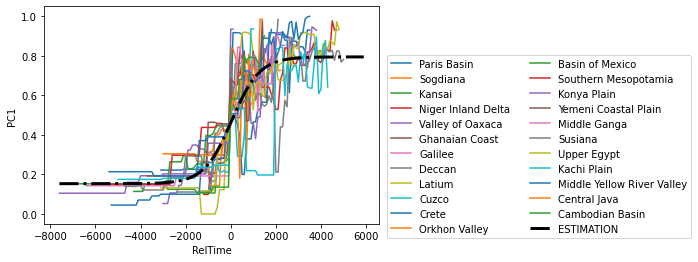

In [20]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["PC1"], label=N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("PC1")
plt.xlabel("RelTime")
plt.show()

#### Residuals


RMSE 0.11796339685054834
RhoSquared 0.7742861676738455


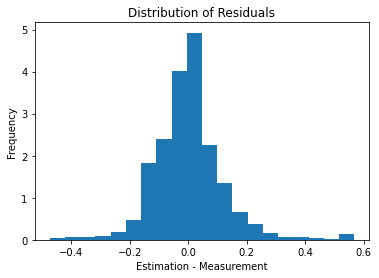

In [21]:
y_est = f(X,a_, b_, c_, d_)
y_est_Residuals = y_est
y_Residuals = y


RMSE = (np.sum((y_est_Residuals-y_Residuals)**2) / len(y)  )**0.5
print("RMSE",RMSE)


print("RhoSquared",RhoSq(y_hat = y_Residuals,
           y_true = y_est_Residuals))

plt.hist(y_est_Residuals-y_Residuals,bins = 20, density = True)
plt.title("Distribution of Residuals")
plt.xlabel("Estimation - Measurement")
plt.ylabel("Frequency")
plt.show()

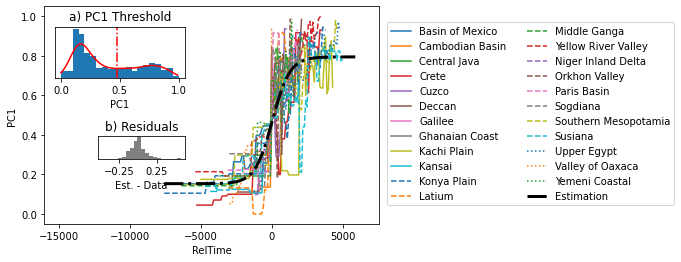

In [22]:
fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.15, 0.63, 0.3, 0.18]
ax2 = fig.add_axes([left, bottom, width, height])

left, bottom, width, height = [0.25, 0.35, 0.2, 0.08]#[0.67, 0.25, 0.22, 0.12]
ax3 = fig.add_axes([left, bottom, width, height])

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    #print(N)
ax1.scatter([-15000,6500], [0.0,1.0], c="white")    
ax1.plot(x_show*T, y_hat, "-.",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("PC1")
ax1.set_xlabel("RelTime")


ax2.hist(Data["PC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) PC1 Threshold")
ax2.set_xlabel("PC1")
ax2.axes.get_yaxis().set_visible(False)


#ax3.set_title("b) Residuals: Est. - Data")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_title("b) Residuals")#": Est. - Data")
ax3.set_xlabel("Est. - Data")
ax3.set_xticks([-0.25,0.25])
ax3.axes.get_yaxis().set_visible(False)

#plt.savefig("NEW_Logistic_Residuals_RelTime.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

# Bootstrapping of Full Data

In [23]:
np.random.seed(4321)
random.seed(4321)
nBT = 100 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters
NGA_list = list(set(Data_RT["NGA"]))


for i in range(nBT):
    NGA_selection = random.choices(NGA_list,k=len(NGA_list))
    Data_Bootstrap = pd.DataFrame(columns = Data_RT.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_RT.query("NGA== @n")])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["PC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0, maxfev=10000) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF_N = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF_N["PC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
    if i%25==0:    
        print(i,a_, b_, c_, d_)
    #print("-----------------")
#print(Params.round(2))

0 0.6488020436780005 0.1602809436063062 7.417187062501113 0.026422178599704586
25 0.6683603464750274 0.16028691753564353 9.650749558811064 0.015442692800230322
50 0.5742477971152697 0.18030529293176792 17.702810883100625 -0.008956871311936563
75 0.6494263859195176 0.16084509805808342 9.306011634057125 0.006662859263875225


In [24]:
print("p0", np.round(p0,2))

print(Params.round(2))
i=0
for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    print("Parameter", P)
    print("Mean", np.mean(Ps), " and Median", np.median(Ps), "p0", p0[i])
    print("StandardDev",np.std(Ps))
    print("50% centred quantiles", np.quantile(Ps, 0.25), 
          np.quantile(Ps, 0.75))
    print("90% centred quantiles", np.quantile(Ps, 0.05), 
          np.quantile(Ps, 0.95))
    print("\n")
    i+=1
    #plt.hist(Ps,bins=20, density= True)
    #plt.plot(P_range, KDE, c="k")
    #plt.title("Parameter "+str(P))
    #plt.show()

p0 [0.64 0.15 8.1  0.01]
       a     b      c     d
0   0.65  0.16   7.42  0.03
0   0.65  0.15   9.31  0.02
0   0.61  0.16   8.46  0.01
0   0.64  0.16   6.97  0.02
0   0.62  0.16  14.75  0.00
..   ...   ...    ...   ...
0   0.69  0.13   8.12  0.01
0   0.61  0.16   9.15  0.02
0   0.64  0.14   7.75  0.01
0   0.58  0.17  15.91 -0.01
0   0.63  0.16   8.85  0.01

[100 rows x 4 columns]
Parameter a
Mean 0.6357141488680068  and Median 0.6402137094259226 p0 0.6414222003761785
StandardDev 0.04808305063284523
50% centred quantiles 0.6131992048462382 0.6639831680860324
90% centred quantiles 0.5450935727335682 0.7014198118305789


Parameter b
Mean 0.15529906540630065  and Median 0.15501825327014696 p0 0.15295979460285525
StandardDev 0.015886043551021307
50% centred quantiles 0.14447067519514578 0.16462738446251968
90% centred quantiles 0.1320153290701493 0.1838966030484358


Parameter c
Mean 10.26812435532615  and Median 8.41685164130038 p0 8.102048663049045
StandardDev 6.286820419931358
50% cent

In [25]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))


0.15529906540630065 0.015886043551021307
0.7910132142743074 0.03625183682822327


In [26]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Q1 = 0.84 # 1-1sigma
Q2 = 0.16 # 1sigma
#Thresh1 = np.quantile(Params["b"], Q1) #np.quantile(Params["b"], ) + np.std(Params["b"])
#Thresh2 = np.quantile(Params["b"]+Params["a"], Q2)#np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
Thresh1 = np.mean(Params["b"]) + 3*np.std(Params["b"])
Thresh2 = np.mean(Params["b"]+Params["a"]) - 3*np.std(Params["b"]+Params["a"])
print("Trhesholds",Thresh1, Thresh2)

def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

print("T1, T2", T1, T)
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

0.15529906540630065 0.015886043551021307
0.7910132142743074 0.03625183682822327
Trhesholds 0.20295719605936458 0.6822577037896376
T1, T2     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([2.21330454e-11])
       r: array([-0.37350582])
  status: 1
 success: True
       x: array([-0.29511545]) 5000
Most of the cultural evolution takes place in a time interval of  2482.0 years.


In [27]:
Thresh1_1sigma = np.mean(Params["b"]) + 1*np.std(Params["b"])
Thresh2_1sigma = np.mean(Params["b"]+Params["a"]) - 1*np.std(Params["b"]+Params["a"])

def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1_1sigma)

def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2_1sigma)


T1_1sigma = opt.root(f1, -0.5)
T2_1sigma = opt.root(f2, 0.5)

C:\Users\Tobias\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


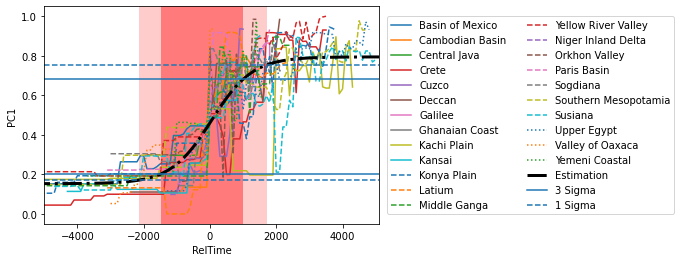

In [28]:

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    plt.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    #print(N)
plt.scatter([-15000,6500], [0.0,1.0], c="white")    
plt.plot(x_show*T, y_hat, "-.",label="Estimation", c = "k", linewidth=3)
plt.ylabel("PC1")
plt.xlabel("RelTime")

T1_scaled, T2_scaled = T*t_1, T*t_2
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T*T1_1sigma["x"], T*T2_1sigma["x"], facecolor='r', alpha=0.2)

plt.axhline(Thresh1, label="3 Sigma")
plt.axhline(Thresh2)

plt.axhline(Thresh1_1sigma,linestyle = "--", label="1 Sigma")
plt.axhline(Thresh2_1sigma,linestyle = "--")

plt.xlim(-5000,5099)

lgd = plt.legend(ncol = 2,
                bbox_to_anchor=[1.01, 0.5], loc='center left')#bbox_to_anchor=(1.01, 0.95), ncol=2)

plt.savefig("VariousSigmas.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [29]:
T*T1_1sigma["x"][0], T*T2_1sigma["x"][0]

(-2130.650723299675, 1728.0209524573286)

In [30]:
T2_scaled - T1_scaled, T2_1sigma.x*T - T*T1_1sigma.x

(array([2482.40112047]), array([3858.67167576]))

In [31]:
Thresh1, Thresh1_1sigma

(0.20295719605936458, 0.17118510895732195)

In [32]:
T1_scaled, T2_scaled

(array([-1475.57722908]), array([1006.8238914]))

In [33]:
T*T1_1sigma["x"], T*T2_1sigma["x"]

(array([-2130.6507233]), array([1728.02095246]))

## Out-of-Sample Prediction

In [34]:
L = len(Data_RT["RelTime"].to_numpy())

X1, y1 = Data_RT["RelTime"].to_numpy(), Data_RT["PC1"].to_numpy()
T = 5000
X1 = np.array(list(X1)) # for some reason, this transformation is necessary
X1 = X1/T # normalisation of the data

OutOfSample_Eval = list()

for i in range(100):
    
    Selection = np.random.choice(np.arange(L), size = int(L/2), replace = False)
    
    X_train = X1[Selection]
    y_train = y1[Selection]
    
    test_indx = np.ones(len(X1), bool)
    test_indx[Selection]=0
    y_test = y1[test_indx]
    X_test = X1[test_indx]
    
    (a1_, b1_, c1_, d1_), _ = opt.curve_fit(f, X_train, y_train)
    #print((a1_, b1_, c1_, d1_))
    OutOfSample_Eval += [RhoSq( f(X_test, a1_, b1_, c1_, d1_), y_test)] 
    
OutOfSample_Eval = np.array(OutOfSample_Eval)
print("Accuracy of Out-Of-Sample Prediction is")
print(np.mean(OutOfSample_Eval),"±",np.std(OutOfSample_Eval))

Accuracy of Out-Of-Sample Prediction is
0.8045631678827949 ± 0.08197751160511806


# Now the Snippets

In [35]:
#print(DF_Tzero)
OLD_DF_Tzero = pd.read_csv("TimeZero.csv", index_col = 0)
#print(OLD_DF_Tzero)

DF_Comparison = pd.DataFrame(index = ["OldData", "NewData"])

for nga in DF_Tzero.index:
    
    if nga in OLD_DF_Tzero.columns:
        #print(nga)
        #print(DF_Tzero.loc[nga].T0)
        #print(OLD_DF_Tzero[nga].T0)
        #print("\n")
        
        DF_Comparison[nga] = pd.Series({"OldData": OLD_DF_Tzero[nga].T0,
                                       "NewData": DF_Tzero.loc[nga].T0})
        
    else:
        DF_Comparison[nga] = pd.Series({"OldData": np.nan,
                                       "NewData": DF_Tzero.loc[nga].T0})
DF_Comparison = DF_Comparison.transpose().sort_index() 
DF_Comparison.head()       
DF_Comparison.to_csv("Compare_Anchor_Times.csv",index= True)

In [66]:
DF_Comparison

,OldData,NewData
Basin of Mexico,NaN,700.0
Cambodian Basin,300.0,300.0
Central Java,800.0,800.0
Crete,NaN,-1700.0
Cuzco,1400.0,700.0
Deccan,-300.0,-300.0
Galilee,NaN,-2000.0
Ghanaian Coast,1800.0,1800.0
Kachi Plain,-2500.0,-2500.0
Kansai,400.0,300.0


Basin of Mexico 8 100.0
Cambodian Basin 13 300.0
Central Java 5 800.0
Crete 10 -1000.0
Cuzco 2 1400.0
Deccan 1 -300.0
Galilee 9 -2000.0
Ghanaian Coast 3 1600.0
Kachi Plain 22 -4000.0
Kansai 5 300.0
Konya Plain 17 -3000.0
Latium 12 -700.0
Middle Ganga 3 -600.0
Middle Yellow River Valley 38 -5000.0
Niger Inland Delta 3 1000.0
Orkhon Valley 4 600.0
Paris Basin 10 -1000.0
Sogdiana 2 -500.0
Southern Mesopotamia 19 -4200.0
Susiana 21 -4300.0
Upper Egypt 33 -3800.0
Valley of Oaxaca 2 1600.0
Yemeni Coastal Plain 3 900.0

# Snippets

In [37]:
Snippets_DF = pd.read_csv("SPC1Dat.Relation.Continuity.csv", index_col=False)
Snippets_DF = Snippets_DF.fillna("no")
print(Snippets_DF.head())

Snippets_DF = Snippets_DF.query("Keep == 'Y'")
Snippets_DF

               NGA    PolID  Time RelTime       SPC Preceeding.Relation Keep  \
0  Basin of Mexico  MxArch* -6000      no  3.210005                  no    N   
1  Basin of Mexico  MxArch* -5900      no  3.210005                  no    N   
2  Basin of Mexico  MxArch* -5800      no  3.210005                  no    N   
3  Basin of Mexico  MxArch* -5700      no  3.210005                  no    N   
4  Basin of Mexico  MxArch* -5600      no  3.210005                  no    N   

  Notes  
0    no  
1    no  
2    no  
3    no  
4    no  


,NGA,PolID,Time,RelTime,SPC,Preceeding.Relation,Keep,Notes
61,Basin of Mexico,MxClass,100,-600.0,4.958509,StartSeq,Y,no
62,Basin of Mexico,MxClass,200,-500.0,4.958509,continuity,Y,no
63,Basin of Mexico,MxClass,300,-400.0,4.958509,continuity,Y,no
64,Basin of Mexico,MxClass,400,-300.0,4.958509,continuity,Y,no
65,Basin of Mexico,MxClass,500,-200.0,4.958509,continuity,Y,no
...,...,...,...,...,...,...,...,...
1437,Valley of Oaxaca,EsHabsb,1700,100.0,7.878041,continuity,Y,no
1475,Yemeni Coastal Plain,EtAksm1,200,0.0,6.375543,StartSeq,Y,no
1482,Yemeni Coastal Plain,YeZiyad,900,-200.0,5.115125,StartSeq,Y,2nd sequence in this NGA
1483,Yemeni Coastal Plain,YeZiyad,1000,-100.0,5.115125,continuity,Y,no


## Manual Discarding:

- Delete Yemeni at time 200: would be just one observation
- Discard second start sequence Susiana
- Discard 2nd sequence in Konya

In [38]:
Snippets_DF = Snippets_DF.drop(labels = [1475], axis = 0) # Yemen
Snippets_DF = Snippets_DF.drop(labels = np.arange(1309, 1319), axis = 0) # Susiana
Snippets_DF = Snippets_DF.drop(labels = np.arange(691, 693), axis = 0) # Konya

Paris Basin (10, 9)
Kansai (5, 9)
Sogdiana (2, 9)
Niger Inland Delta (3, 9)
Valley of Oaxaca (2, 9)
Ghanaian Coast (3, 9)
Galilee (9, 9)
Deccan (1, 9)
Latium (12, 9)
Cuzco (2, 9)
Crete (10, 9)
Orkhon Valley (4, 9)
Basin of Mexico (8, 9)
Southern Mesopotamia (19, 9)
Konya Plain (17, 9)
Yemeni Coastal Plain (3, 9)
Middle Ganga (3, 9)
Susiana (21, 9)
Upper Egypt (33, 9)
Kachi Plain (22, 9)
Middle Yellow River Valley (38, 9)
Central Java (5, 9)
Cambodian Basin (13, 9)


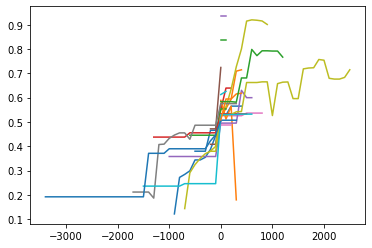

In [39]:
Snippets_DF = Snippets_DF.reset_index(drop = True)

Snippets_DF["PC1"] = (Snippets_DF.SPC - Minimum)/(Maximum-Minimum)

for n in set(sorted(Snippets_DF.NGA)):
    
    Snippet_n = Snippets_DF.query("NGA == @n")
    print(n, Snippet_n.shape)
    plt.plot(Snippet_n.RelTime, Snippet_n.PC1, label = n)
#plt.legend()
plt.show()

# Redo the Logistic Curve fit with the snippets

In [40]:
X, y = Snippets_DF["RelTime"].to_numpy(), Snippets_DF["PC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data


(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0 = p0)  # Old starting guess

P0 = np.array((a_, b_, c_, d_))
np.set_printoptions(suppress=True)

print("Full data:",np.round(p0,3))
print("Snippets:",np.round(P0,3))

Full data: [0.641 0.153 8.102 0.01 ]
Snippets: [ 0.515  0.222 10.686 -0.031]


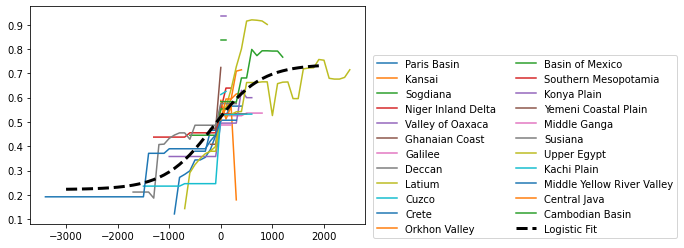

In [41]:

for n in list(set(Snippets_DF["NGA"])):
    smalldf = Snippets_DF.loc[Snippets_DF["NGA"]==n]
    #print(smalldf)
    plt.plot(smalldf["RelTime"], smalldf["PC1"], label=n)

TimeRange = np.arange(-3000,2000,100)
New_Fit = f(TimeRange/T, a_, b_, c_, d_)
plt.plot(TimeRange, New_Fit, "--",label="Logistic Fit", c="k", linewidth = 3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

## Out-of-Sample prediction
To evaluate quality of the fit.

In [42]:
int(len(list(set(Snippets_DF.NGA)))/2)

11

In [43]:
Selection = np.random.choice(list(set(Snippets_DF.NGA)), 
                 size=int(len(list(set(Snippets_DF.NGA)))/2), 
                 replace = False)

print(Selection)

print(Snippets_DF.query("NGA in @Selection"))
print(Snippets_DF.query("NGA not in @Selection"))

['Central Java' 'Southern Mesopotamia' 'Susiana' 'Ghanaian Coast'
 'Valley of Oaxaca' 'Basin of Mexico' 'Kachi Plain' 'Yemeni Coastal Plain'
 'Cuzco' 'Upper Egypt' 'Orkhon Valley']
                      NGA    PolID  Time RelTime       SPC  \
0         Basin of Mexico  MxClass   100  -600.0  4.958509   
1         Basin of Mexico  MxClass   200  -500.0  4.958509   
2         Basin of Mexico  MxClass   300  -400.0  4.958509   
3         Basin of Mexico  MxClass   400  -300.0  4.958509   
4         Basin of Mexico  MxClass   500  -200.0  4.958509   
..                    ...      ...   ...     ...       ...   
240      Valley of Oaxaca  EsHabsb  1600     0.0  7.878041   
241      Valley of Oaxaca  EsHabsb  1700   100.0  7.878041   
242  Yemeni Coastal Plain  YeZiyad   900  -200.0  5.115125   
243  Yemeni Coastal Plain  YeZiyad  1000  -100.0  5.115125   
244  Yemeni Coastal Plain  YeWarLd  1100     0.0  6.621210   

    Preceeding.Relation Keep                     Notes       PC1  
0      

In [44]:
L = len(Snippets_DF["RelTime"].to_numpy())

C_list = list()
RhoSqList = list()
n_split = 1000
for i in range(1000):
    
    Selection = np.random.choice(np.arange(L), size = int(L/2), replace = False)
    
    X_train = X[Selection]
    y_train = y[Selection]
    
    test_indx = np.ones(len(X), bool)
    test_indx[Selection]=0
    y_test = y[test_indx]
    X_test = X[test_indx]
    
    (a1_, b1_, c1_, d1_), _ = opt.curve_fit(f, X_train, y_train,
                                            p0 = p0) # initial guess to ensure c > 0
    #print((a1_, b1_, c1_, d1_))
    C_list.append(c1_)
    RhoSqList.append(RhoSq( f(X_test, a1_, b1_, c1_, d1_), y_test))
    

In [45]:
print("Results of Out-of-sample prediction")
np.mean(RhoSqList), np.std(RhoSqList)

Results of Out-of-sample prediction


(0.6718725453998077, 0.04009635359887297)

## Bootstrapping

First round of bootstrap: estimate many parameter values for a and b and the standard deviations for a, b a+b. This allows to compute the thresholds of the plateaus.

In [46]:
np.random.seed(4321)
random.seed(4321)
nBT = 1000 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters
NGA_list = list(set(Snippets_DF["NGA"]))


for i in range(nBT):
    NGA_selection = random.choices(NGA_list,k=len(NGA_list))
    Data_Bootstrap = pd.DataFrame(columns = Snippets_DF.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Snippets_DF.query("NGA== @n")])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["PC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0, maxfev=10000) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF["PC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
        
    #print(a_, b_, c_, d_)
    #print("-----------------")
#print(Params.round(2))

In [47]:
print(Params.round(2))

for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    print("Parameter", P)
    print("Mean", np.mean(Ps), " and Median", np.median(Ps))
    print("50% centred quantiles", np.quantile(Ps, 0.25), 
          np.quantile(Ps, 0.75))
    print("90% centred quantiles", np.quantile(Ps, 0.05), 
          np.quantile(Ps, 0.95))
    print("\n")
    #plt.hist(Ps,bins=20, density= True)
    #plt.plot(P_range, KDE, c="k")
    #plt.title("Parameter "+str(P))
    #plt.show()

       a     b       c     d
0   0.47  0.23   11.80 -0.04
0   0.54  0.21    9.99 -0.07
0   0.46  0.23   14.97 -0.05
0   0.45  0.21   14.20 -0.04
0   0.29  0.33  190.61 -0.01
..   ...   ...     ...   ...
0   0.53  0.20    8.70 -0.04
0   0.49  0.22   13.38 -0.05
0   0.53  0.19    7.67 -0.05
0   0.53  0.20    8.94 -0.04
0   0.44  0.30   18.15  0.01

[1000 rows x 4 columns]
Parameter a
Mean 61.55790483963964  and Median 0.5216004625283007
50% centred quantiles 0.45122759561840403 0.6202615704897585
90% centred quantiles 0.3354091824497891 2.195608326025359


Parameter b
Mean 0.19750636754313544  and Median 0.21608899295187137
50% centred quantiles 0.18562711017910505 0.2631214304726042
90% centred quantiles 0.12640391151504732 0.344988589537396


Parameter c
Mean 40.375356127324544  and Median 10.576657725977086
50% centred quantiles 7.519302490369277 16.106713285083472
90% centred quantiles 3.9520094459961954 32.11400100133779


Parameter d
Mean 0.1321724975237234  and Median -0.017047435

### Analysis of the Curve

When does f(x) = y_est actually change? 
f(-infinity) = b and f(infinity) = a + b. We can now calculate the standard deviations of b and a+b via the bootstrap estimations and check when y_est exceeds b + sd(b) and reaches a+b - sd(a+b).

Maybe this works better if we set d=0 (as indicated by the empirical quantiles)?

In [48]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Q1 = 0.84 # 1-1sigma
Q2 = 0.16 # 1sigma
Thresh1 = np.quantile(Params["b"], Q1) #np.quantile(Params["b"], ) + np.std(Params["b"])
Thresh2 = np.quantile(Params["b"]+Params["a"], Q2)#np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
print(Thresh1, Thresh2)

def f1(x):
    # first threshold
    return(f(x, P0[0], P0[1], P0[2], P0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

def f2(x):
    # second threshold
    return(f(x, P0[0], P0[1], P0[2], P0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

print("T1, T2", T1, T)
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

0.19750636754313544 0.4175719352838969
61.755411207182675 507.41588991564277
0.2933282076546555 0.6914790107534321
T1, T2     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([0.])
       r: array([-0.65652209])
  status: 1
 success: True
       x: array([-0.20173642]) 5000
Most of the cultural evolution takes place in a time interval of  1945.0 years.


## Bootstrapping the Time Interval

Now we can repeat this task, but 

-> Calculate the time thresholds T1/T2 for every single Bootstrapped Data and therefore calculate a time interval with standard deviation

In [49]:
def fBT1(x):
    # first threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh1)

def fBT2(x):
    # second threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh2)


np.random.seed(1234)
random.seed(1234)
nBT = 1000 # how many Bootstraps
Successes = 0

Params2 = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    
    # Select the random NGAs
    NGA_selection = random.choices(NGA_list,k=len(NGA_list))
    Data_Bootstrap = pd.DataFrame(columns = Snippets_DF.columns)

    for n in NGA_selection: # combine them to a data frame
        Data_Bootstrap = pd.concat([Data_Bootstrap, Snippets_DF[Snippets_DF["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["PC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, P0,maxfev=10000) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0
    
    # Time Intervals
    T1 = opt.root(fBT1, t_1)
    T2 = opt.root(fBT2, t_2)
    
    # only add results, if opt.root is successful:
    if T1["success"] and T2["success"]:
        Successes += 1
        Params2 = pd.concat([Params2,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_], "T1":T1["x"], "T2":T2["x"]})])    
        #print(a_, b_, c_, d_, T1, T2)
        #print("-----------------")
print(Successes)
print(Params2.round(2))

C:\Users\Tobias\AppData\Local\Temp/ipykernel_15196/652433116.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


731
         a     b      c     d    T1    T2
0     0.51  0.23  11.09 -0.03 -0.20  0.18
0     0.44  0.25  22.35 -0.02 -0.12  0.22
0     0.50  0.19   9.55 -0.04 -0.19  0.47
0     0.47  0.24  20.43 -0.02 -0.13  0.12
0   181.03  0.02   2.02  2.90 -0.31  0.13
..     ...   ...    ...   ...   ...   ...
0     1.85  0.10   3.12  0.40 -0.28  0.16
0     0.59  0.17   6.29 -0.05 -0.26  0.28
0     0.57  0.16   6.16 -0.08 -0.27  0.35
0     0.47  0.23  11.88 -0.02 -0.18  0.35
0     1.13  0.15   4.79  0.16 -0.25  0.14

[731 rows x 6 columns]


In [50]:
T2_scaled, T1_scaled = np.mean(Params2["T2"])*T, T*np.mean(Params2["T1"])

T1_start_scaled = T*np.mean(Params2["T1"]) - T*np.std(Params2["T1"])
T2_end_scaled = T*np.mean(Params2["T2"]) + T*np.std(Params2["T2"])

TimeframeBT = Params2["T2"]-Params2["T1"]
print(np.mean(TimeframeBT))

# times T for the transformation to years
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)),
     u"\u00B1",np.round(T*np.std(TimeframeBT)), "years.")

0.4157454182399139
Most of the cultural evolution takes place in a time interval of  2079.0 ± 530.0 years.


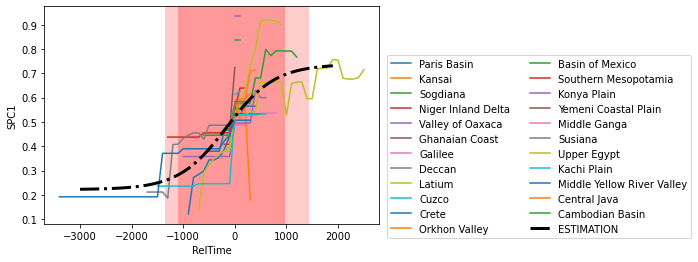

In [51]:
DF_Out_cutout = pd.DataFrame(columns=["NGA","RelTime","PC1"])

for N in list(set(Snippets_DF["NGA"])):
    DF = Snippets_DF[Snippets_DF["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["PC1"], label=N)
    DF_Out_cutout = pd.concat((DF_Out_cutout, DF[["NGA", "RelTime", "PC1"]]))
    #print(N)
    
plt.plot(TimeRange, New_Fit, "-.",label="ESTIMATION", c = "k", linewidth=3)

plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
plt.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)

plt.savefig("SPC1_Time_Interval_Cutouts_Bootstrapped_no_Legend.pdf",dpi = 200, bbox_inches='tight')
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.savefig("SPC1_Time_Interval_Cutouts_Bootstrapped",dpi = 200, bbox_inches='tight')
plt.savefig("SPC1_Time_Interval_Cutouts_Bootstrapped.pdf",dpi = 200, bbox_inches='tight')
plt.show()

Basin of Mexico 8 100.0 800.0
Cambodian Basin 13 300.0 1500.0
Central Java 5 800.0 1200.0
Crete 10 -1000.0 -100.0
Cuzco 2 1400.0 1500.0
Deccan 1 -300.0 -300.0
Galilee 9 -2000.0 -1200.0
Ghanaian Coast 3 1600.0 1800.0
Kachi Plain 22 -4000.0 -1900.0
Kansai 5 300.0 700.0
Konya Plain 17 -3000.0 -1400.0
Latium 12 -700.0 400.0
Middle Ganga 3 -600.0 -400.0
Middle Yellow River Valley 38 -5000.0 -1300.0
Niger Inland Delta 3 1000.0 1200.0
Orkhon Valley 4 600.0 900.0
Paris Basin 10 -1000.0 -100.0
Sogdiana 2 -500.0 -400.0
Southern Mesopotamia 19 -4200.0 -2400.0
Susiana 21 -4300.0 -2300.0
Upper Egypt 33 -3800.0 -600.0
Valley of Oaxaca 2 1600.0 1700.0
Yemeni Coastal Plain 3 900.0 1100.0


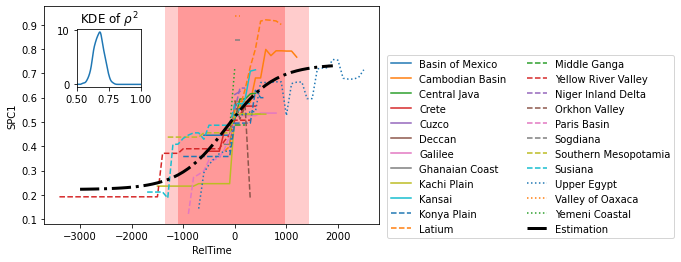

In [52]:
fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.6, 0.15, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
style ="-"

for N in sorted(list(set(Snippets_DF["NGA"]))):
    DF = Snippets_DF[Snippets_DF["NGA"] == N]

      # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    elif N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
    else:
        name = N
        
    print(N, DF.shape[0], float(DF.head(1).Time), float(DF.tail(1).Time))
    #print(DF["RelTime"])
    ax1.plot(DF["RelTime"],   
             DF["PC1"], style,label=name)
    DF_Out_cutout = pd.concat((DF_Out_cutout, DF[["NGA", "RelTime", "PC1"]]))
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    
ax1.plot(TimeRange, New_Fit, "-.",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)

ax2.plot(np.arange(0.0,1,0.001),
    gaussian_kde(RhoSqList)(np.arange(0.0,1,0.001)))
ax2.set_title(r'KDE of $\rho^2$')
ax2.set_xlim([0.5,1.0])

plt.savefig("NEW_Cutout_Logistic_Times_Inset.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [53]:
DF.head(1).Time

242    900
Name: Time, dtype: int64

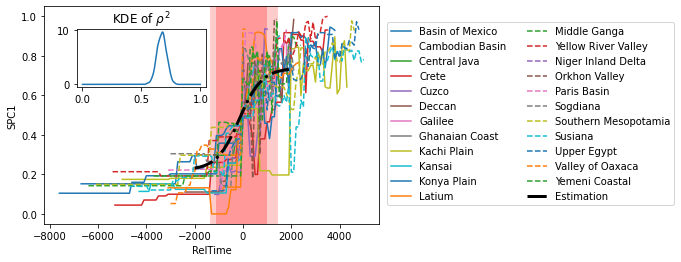

In [54]:

TimeRange = np.arange(-2000,2000,100)
New_Fit = f(TimeRange/T, P0[0], P0[1], P0[2], P0[3])


fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.6, 0.3, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
style ="-"


for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    if N == "Latium":
        style = "--"
    
ax1.plot(TimeRange, New_Fit, "-.",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)

ax2.plot(np.arange(0.0,1,0.001),
    gaussian_kde(RhoSqList)(np.arange(0.0,1,0.001)))
ax2.set_title(r'KDE of $\rho^2$')

#plt.savefig("Cutout_Logistic_Times_Inset.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [55]:
p0

array([0.6414222 , 0.15295979, 8.10204866, 0.00981527])

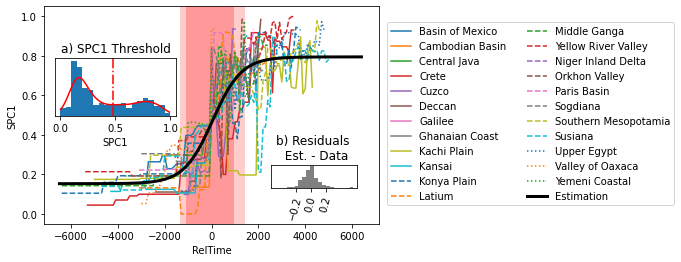

In [56]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,6500,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.15, 0.5, 0.28, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.65, 0.25, 0.2, 0.08]#[0.67, 0.25, 0.22, 0.12]
ax3 = fig.add_axes([left, bottom, width, height])

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    DF = DF[DF["RelTime"]> T_start]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    #print(N)
ax1.scatter([-T_start,6500], [0.0,1.0], c="white")    
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
#ax1.set_xlim([-5000, 5000])

ax2.hist(Data["PC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) SPC1 Threshold")
ax2.set_xlabel("SPC1")
ax2.axes.get_yaxis().set_visible(False)


#ax3.set_title("b) Residuals: Est. - Data")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_title("b) Residuals \n Est. - Data")#": Est. - Data")
#ax3.set_xlabel("Est. - Data")
#ax
ax3.set_xticks([-0.2,0,0.2])
ax3.tick_params(axis='x', rotation=75)
ax3.axes.get_yaxis().set_visible(False)
#plt.xlim(-5000,5000)

plt.savefig("NEW_Logistic_Residuals_RelTime.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [57]:
min(y_est_Residuals-y_Residuals),max(y_est_Residuals-y_Residuals)

(-0.473693995224527, 0.5669726215556053)

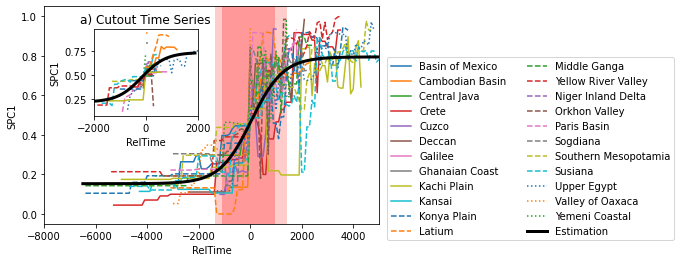

In [58]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,6500,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.24, 0.5, 0.24, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

style = "-"

Colours, Styles  = dict(), dict()

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    DF = DF[DF["RelTime"]> T_start]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    P1 = ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    #print(P1[-1].get_color())
    Colours[N] = P1[-1].get_color()
    Styles[N] = style
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"   
    #print(N)
ax1.scatter([-T_start,6500], [0.0,1.0], c="white")    
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
#lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
#ax1.set_xlim([-5000, 5000])
#ax1.plot(TimeRange, New_Fit, "--",c="k", linewidth = 2)

ax1.set_xlim(-8000,5000)


for N in list(set(Snippets_DF["NGA"])):
    DF = Snippets_DF[Snippets_DF["NGA"] == N]
    ax2.plot(DF["RelTime"],   
             DF["PC1"], Styles[N], c = Colours[N])
    DF_Out_cutout = pd.concat((DF_Out_cutout, DF[["NGA", "RelTime", "PC1"]]))
    #print(N)
ax2.set_xlim(-2000,2000)
ax2.set_title("a) Cutout Time Series")
ax2.set_xlabel("RelTime")
ax2.set_ylabel("SPC1")
ax2.plot(TimeRange, New_Fit, "-",label="ESTIMATION", c = "k", linewidth=3)
lgd = ax1.legend(ncol = 2,bbox_to_anchor=(1.01, 0.79))
plt.savefig("Cutout_and_Full_Logistic_Plots.pdf",
            bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [59]:
TimeRange, New_Fit

(array([-2000, -1900, -1800, -1700, -1600, -1500, -1400, -1300, -1200,
        -1100, -1000,  -900,  -800,  -700,  -600,  -500,  -400,  -300,
         -200,  -100,     0,   100,   200,   300,   400,   500,   600,
          700,   800,   900,  1000,  1100,  1200,  1300,  1400,  1500,
         1600,  1700,  1800,  1900]),
 array([0.23178133, 0.23405228, 0.23683623, 0.24024114, 0.24439371,
        0.24944057, 0.25554855, 0.2629032 , 0.27170485, 0.28216126,
        0.29447587, 0.30883112, 0.32536669, 0.34415403, 0.36516969,
        0.38827207, 0.41318714, 0.43950887, 0.46671792, 0.49421863,
        0.52138942, 0.54763802, 0.5724512 , 0.59543076, 0.61631107,
        0.63495836, 0.65135583, 0.66557992, 0.6777737 , 0.68812147,
        0.69682739, 0.70409904, 0.71013601, 0.71512277, 0.71922492,
        0.72258785, 0.72533704, 0.72757934, 0.72940479, 0.73088862]))

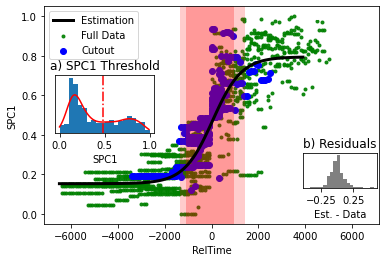

In [60]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,4000,100)/T
 
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])    # FULL REGRESSION

#y_hat = f(x_show, P0[0], P0[1], P0[2], P0[3])  # CUTOUT-REgression

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.15, 0.44, 0.23, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.725, 0.25, 0.17, 0.12]#[0.67, 0.25, 0.22, 0.12]
ax3 = fig.add_axes([left, bottom, width, height])

Label1 = "Full Data"
Label2 = "Cutout"

ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    DF = DF[DF["RelTime"]> T_start]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.scatter(DF["RelTime"],    
             DF["PC1"],marker = ".", c = "green", label=Label1, alpha = 0.9)
    Label1 = None
    
for N in sorted(list(set(Data_RT["NGA"]))):
    
    ax1.scatter(Snippets_DF.query("NGA == @N").RelTime,
            Snippets_DF.query("NGA == @N").PC1, 
            c = "blue", label =Label2)
    
    Label2 = None
    #print(N)
ax1.scatter([-T_start,4500], [0.0,1.0], c="white")    
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend()#bbox_to_anchor=(1.01, 0.95), ncol=1)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
#ax1.set_xlim([-5000, 5000])

ax2.hist(Data["PC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) SPC1 Threshold")
ax2.set_xlabel("SPC1")
ax2.axes.get_yaxis().set_visible(False)


#ax3.set_title("b) Residuals: Est. - Data")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_title("b) Residuals")#": Est. - Data")
ax3.set_xlabel("Est. - Data")
ax3.set_xticks(np.arange(-0.25,0.26,0.5))
ax3.axes.get_yaxis().set_visible(False)
#plt.xlim(-5000,5000)

plt.savefig("NEW_Logistic_Residuals_RelTime_scattered.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [61]:
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)), 
      "years. The interval's start and end times are", np.round(T1_scaled), "and", np.round(T2_scaled),
      "The lower boundary's uncertainty is", np.round(T1_start_scaled), "and the upper boundary's uncertainty is", 
     np.round(T2_end_scaled), "years. Thus, the upper estimate for the time range is", np.round(T2_end_scaled-T1_start_scaled), "years.")

Most of the cultural evolution takes place in a time interval of  2079.0 years. The interval's start and end times are -1102.0 and 976.0 The lower boundary's uncertainty is -1360.0 and the upper boundary's uncertainty is 1436.0 years. Thus, the upper estimate for the time range is 2796.0 years.


### Cutout vs Full Logistic Curve

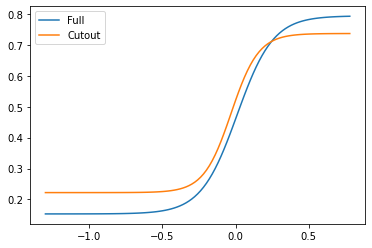

In [62]:
x_show = np.arange(T_start,4000,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

plt.plot(x_show, y_hat, label="Full")
plt.plot(x_show,f(x_show, P0[0], P0[1], P0[2], P0[3]), label="Cutout" )
plt.legend()